# 01 - Simulating coin flips
Learnings from [this](https://courses.edx.org/courses/course-v1:UCSanDiegoX+DSE210x+3T2018/course/) MOOC.

In [63]:
%matplotlib inline

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

## Probability Theory
Probability Theory is a **mathematical** framework for computing the probability of complex events.

### Generating a matrix that represents results of flipping 10 fair coins repeated 3 times.

In [20]:
t = np.random.randn(10,3);t

array([[ 0.51071441,  0.41429764,  1.34454942],
       [ 0.49351532, -0.23700418,  0.05728515],
       [-0.70707145,  0.54666484,  0.94250041],
       [-2.97959677,  1.21814885, -0.05652072],
       [ 0.46088845,  0.66237401, -2.29510333],
       [-1.19592931, -0.33310116, -0.79139077],
       [ 0.27417278, -0.51490992, -1.7110712 ],
       [ 0.61229731,  1.10012937,  0.56435253],
       [-0.71279944, -0.26085948,  0.54842807],
       [ 0.60319905,  1.00686114, -0.29442601]])

In [21]:
t = t>0.5;t

array([[ True, False,  True],
       [False, False, False],
       [False,  True,  True],
       [False,  True, False],
       [False,  True, False],
       [False, False, False],
       [False, False, False],
       [ True,  True,  True],
       [False, False,  True],
       [ True,  True, False]])

In [22]:
t = 2*t;t

array([[2, 0, 2],
       [0, 0, 0],
       [0, 2, 2],
       [0, 2, 0],
       [0, 2, 0],
       [0, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [0, 0, 2],
       [2, 2, 0]])

In [23]:
t-=1;t

array([[ 1, -1,  1],
       [-1, -1, -1],
       [-1,  1,  1],
       [-1,  1, -1],
       [-1,  1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1,  1, -1]])

Here, `1` represents `heads`, and `-1` represents `tails`. This is so that on summing them up (along the columns), we can see that the resultant sum is zero or close to zero (confirming the intuition that almost half of the results are `heads` and the rest are `tails`)

In [26]:
t = np.sum(t,axis=0);t

array([-4,  0, -2])

### Plotting histograms of these sums

In [7]:
# Generate the sum of k coin flips, repeat that n times
def generate_counts(k=1000,n=100):
    np.random.seed(10)
    X=2*(np.random.rand(k,n)>0.5)-1  # generate a kXn matrix of +-1 random numbers
    S=np.sum(X,axis=0) 
    return S 

In [78]:
k=1000
n=1000
counts=generate_counts(k=k,n=n)

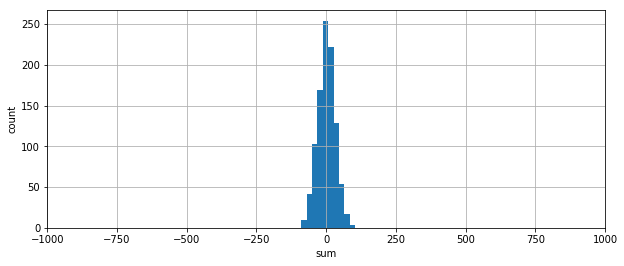

In [79]:
fig,ax = plt.subplots(figsize=[10,4])
ax.hist(counts);
ax.set_xlim([-k,k])
ax.set_xlabel("sum")
ax.set_ylabel("count")
ax.grid()
plt.show()

Here, the area above postive x-axis represents the cases where heads were seen more than tails, and the opposite for the area above negative x-axis.

### Varying the number of flips

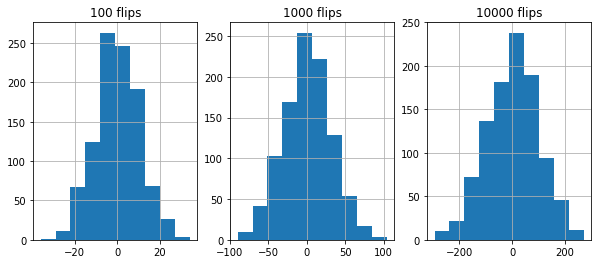

In [80]:
n_flips = [100, 1000, 10000]

fig, axes = plt.subplots(1,3, figsize=(10,4))
for i, ax in enumerate(axes.flat):
    k = n_flips[i]
    counts=generate_counts(k=k,n=1000)
    ax.hist(counts,bins=10);
    ax.set_title(f'{k} flips')
    ax.grid()
plt.show()

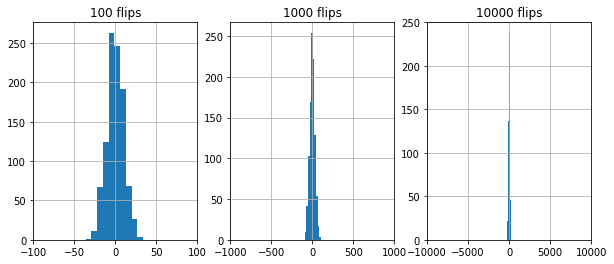

In [81]:
n_flips = [100, 1000, 10000]

fig, axes = plt.subplots(1,3, figsize=(10,4))
for i, ax in enumerate(axes.flat):
    k = n_flips[i]
    counts=generate_counts(k=k,n=1000)
    ax.hist(counts,bins=10);
    ax.set_xlim([-k,k])
    ax.set_title(f'{k} flips')
    ax.grid()
plt.show()

In all cases, sum $S_{k}$ is not **exactly** $0$, it is **close to** $0$, which confirms that the number of times we get heads is almost equal to the number of times we get tails.

**Probability theory** states that the probability that:
$$\big| S_k \big| \geq 4\sqrt{k}$$

is smaller than `2e-8`. (To be proved later)

For now let's just plot these limits.

In [2]:
from math import sqrt

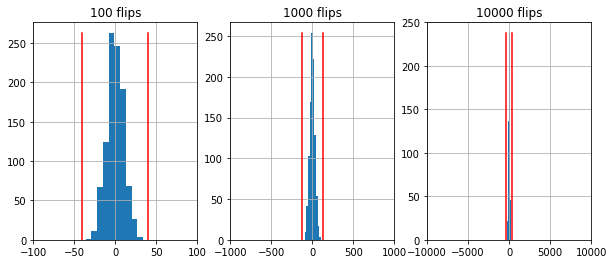

In [8]:
n_flips = [100, 1000, 10000]

fig, axes = plt.subplots(1,3, figsize=(10,4))
for i, ax in enumerate(axes.flat):
    k = n_flips[i]
    counts=generate_counts(k=k,n=1000)
    y,x,_ = ax.hist(counts,bins=10)
    y_max = y.max()
    ax.set_xlim([-k,k])
    d=4*sqrt(k)
    ax.plot([-d,-d],[0,y_max],'r')
    ax.plot([+d,+d],[0,y_max],'r')
    ax.set_title(f'{k} flips')
    ax.grid()
plt.show()

## Statistics

Probability theory computes probabilities of complex events given the underlying base probabilities.

Statistics takes us in the opposite direction.

We are given data that was generated by a Stochastic process

We infer properties of the underlying base probabilities.

Statistics is about analyzing real-world data and drawing conclusions.

### Example
Let's say we flip a coin 1000 times and get 570 heads. Can we conclude that the coin is biased (not fair) ?

### The Logic of Statistical inference
- Suppose that the coin is fair.
- Use probability theory to compute the probability of getting at least 570 (or 507) heads

As per the nomenclature that we used above:
If number of heads is $570$ then $S_{1000} = 570-430 = 140$

Let's find the boundary that we calculated above, ie, $4\sqrt{k}$, where we established that the absolute value of the sum is very unlikely to go beyond these boundaries. (yet to learn why though)

In [3]:
4*sqrt(1000)

126.49110640673517

Since $140>126.49$, we can say that it is very unlikely that the coin is unbiased. In other words, the coin very likely to be biased.

What about $507$ heads?

$S_{1000} = 507-493 = 14$.

Since $14 \ll 126.5$, we cannot conclude that the coin is biased. (It might be, but we don't have enough evidence to conclusively say that. We need to conduct more coin flips.)